<a href="https://colab.research.google.com/github/Mstfayldz/Data-Science/blob/master/Balancing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np

# Kanser Dataset
bu örneği kanser ihtimali olan insanların tahlilleri gibi düşünün 0 olanlar kanser değil 1 olanlar kanser ve kanser olan kişi sayısı kanser olmayanlardan çok daha az olduğu için bu dataset çok işiizi görmeyebilir bu durumlarda neler yapacağız ona bakacağız

In [89]:
# random.seed(value)==> belli bir değişkene göre random oluştut yani saçma değerler çıkmasın diye
np.random.seed(42)
set1no=900
set2no=100

In [90]:
df1= pd.DataFrame(
    {
        "feature_1": np.random.normal(loc=0,scale=1,size=set1no),
        "feature_2": np.random.normal(loc=0,scale=1,size=set1no),
        "target":[0]*set1no
    }
)
df2= pd.DataFrame(
    {
        "feature_1": np.random.normal(loc=0,scale=1,size=set2no),
        "feature_2": np.random.normal(loc=0,scale=1,size=set2no),
        "target":[1]*set2no
    }
)

In [91]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [92]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [93]:
df=pd.concat([df1,df2]).reset_index(drop=True)

In [94]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [95]:
df[df["target"]==1].count()

,0
feature_1,100
feature_2,100
target,100


In [96]:
df["target"].value_counts()

,count
target,
0,900
1,100


# SCIKIT-LEARN(RESAMPLİNG)





**Upsampling**--> upsample miniority (küçük olanı yani örnekteki 100 değerini artırmak)

**Downsampling** --> downsample majority(büyük olan yani 900 ü küçültmek) burda eğer datasetimiz çok büyük değilse tercih edilmez çünkü veriyi azaltmak demek bu

**Skelearn**--> Kütüphanesini çok kullanacağız  




*  [Scikit learn](https://scikit-learn.org/stable/)
*   [Scikit learn PyPl](https://pypi.org/project/scikit-learn/)




In [97]:
df_miniority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [98]:
df_miniority.head()

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1


In [99]:
from sklearn.utils import resample

#UPSAMPLING ==> 100 olan target=0 ları da 900 olan target =1 e eşitleyeceğiz

In [100]:
df_miniority_upsample=resample(df_miniority,replace=True,n_samples=len(df_majority), random_state=42)

In [101]:
df_miniority_upsample.shape

(900, 3)

In [102]:
df_miniority_upsample.head()

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1


In [103]:
df_upsampled=pd.concat([df_majority,df_miniority_upsample])

In [104]:
df_upsampled["target"].value_counts()

,count
target,
0,900
1,900


#DOWNSAMPLİNG => burda da 900 olan target= 1 i 100 olan target= 0 a eşitleyecez

In [105]:
df_majority_downsample=resample(df_majority,replace=True,n_samples=len(df_miniority), random_state=42)

In [106]:
df_majority_downsample.shape

(100, 3)

In [107]:
df_majority_downsample.head()

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0


In [108]:
df_downsampled=pd.concat([df_miniority,df_majority_downsample])

In [109]:
df_downsampled["target"].value_counts()

,count
target,
1,100
0,100


In [110]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [111]:
df[df["target"]==1].mean()

,0
feature_1,-0.049167
feature_2,0.086637
target,1.000000


In [112]:
df_upsampled[df_upsampled["target"]==1].mean()

,0
feature_1,-0.028254
feature_2,0.112040
target,1.000000


In [113]:
df_downsampled[df_downsampled["target"]==1].mean()


,0
feature_1,-0.049167
feature_2,0.086637
target,1.000000


Upsampling için aynı dataları değil de sentetik olarak benzer datalar üretebiliris **SMOTE**(Synthetic Miniority Over-sampling Technique) yöntemiyle

In [114]:
import matplotlib.pyplot as plt

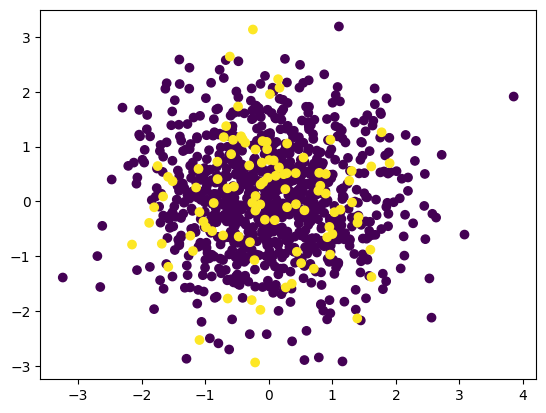

In [115]:
plt.scatter(df["feature_1"],df["feature_2"],c=df["target"])

**Imblearn** [sitesi](https://imbalanced-learn.org/stable/)

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
over_sample=SMOTE(random_state=42)# burda aslında SMOTE tan bir obje oluşturyoruz gibi

In [118]:
#X=> features olur yani örenğin biz ev fiyatı tahmin edeceğiz özellikler ve bu tahmini etkileyen şeyler bu olur
#y=> target yani bizim bulmak istediğimiz değer örenktekne göre ev fiyatı

In [119]:
(X, y)=over_sample.fit_resample(df[['feature_1',"feature_2"]],df["target"])

In [120]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,1.248119,-0.258363
1796,0.798539,0.186262
1797,-0.314318,1.076472
1798,1.117630,-0.142621


In [121]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1795,1
1796,1
1797,1
1798,1


In [122]:
over_sample_df=pd.concat([X,y],axis=1)

In [123]:
over_sample_df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,1.248119,-0.258363,1
1796,0.798539,0.186262,1
1797,-0.314318,1.076472,1
1798,1.117630,-0.142621,1


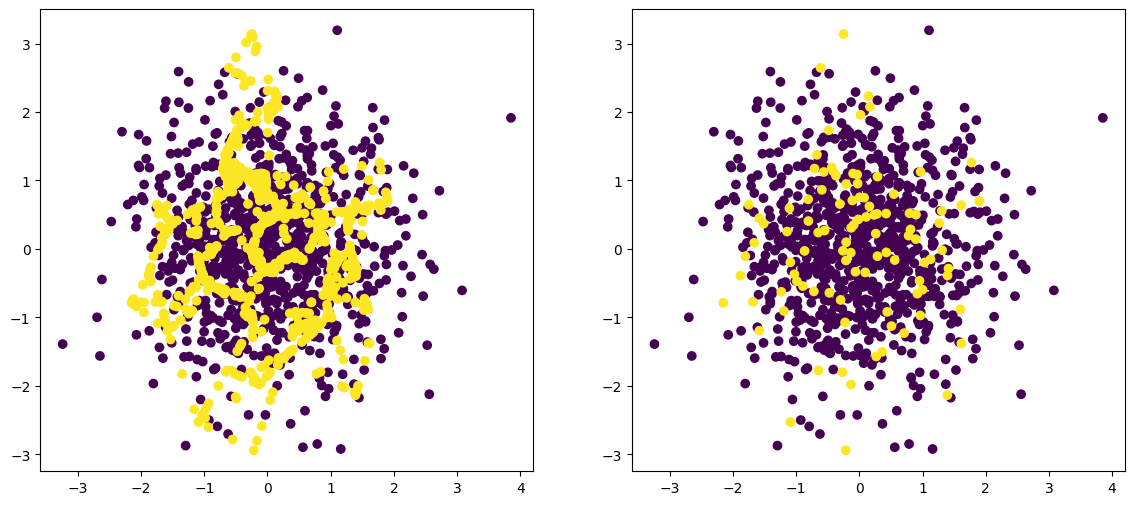

In [124]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(over_sample_df["feature_1"],over_sample_df["feature_2"],c=over_sample_df["target"])
plt.subplot(1,2,2)
plt.scatter(df["feature_1"],df["feature_2"],c=df["target"])

In [125]:
over_sample_df["target"].value_counts()

,count
target,
0,900
1,900


In [126]:
over_sample_df[over_sample_df["target"]==1].mean() # değerler daha da birbirine yaklaştı normal upsampling den daha yakın değerler oluştu

,0
feature_1,-0.043807
feature_2,0.073059
target,1.000000


In [127]:
df[df["target"]==1].mean()

,0
feature_1,-0.049167
feature_2,0.086637
target,1.000000
